<a href="https://colab.research.google.com/github/geo-yrao/ML4ES-tutorials/blob/master/NCICS_ML_lecture_11_INCOMPLETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NCICS ML Lesson 11: introduction to neural networks

Welcome to Lesson 10 of the North Carolina Institute for Climate Studies' Machine Learning Course. Finally, we've arrived at neural networks (NN)! As mentioned in the lecture, NN are some of the most powerful and most interesting ML algorithms out there. They happen to form the basis for my personal favorites, recurrent neural nets, and are capable of learning far more complex patterns than most of the algorithms that we've encountered thus far.

In this notebook, we'll be working with the most basic type of NN: the multilayer perceptron.  We'll be using the same data set as the past several lessons: the US Climate Reference Network's (USCRN) soil moisture data from its Asheville station.

We will continue to attack the regression problem that we've worked on the past two lessons: attempting to estimate the soil moisture levels from precipitation data.

## About the data set:

Refer to the *USCRN_Daily_Data_readme.txt* file in the repository for a complete description of this dataset.

# Preprocess the data

As mentioned above, we'll be using a new data set from the US Climate Reference Network's Asheville station. Let's load and preprocess it.

In [ ]:
# Define the path and names of our data files.
path_data_dir =\
  "./ML4ES-tutorials/00-Data/USCRN-data/"
filename_data = "USCRN-NC_Asheville_8_SSW_2001-2019.csv"

# Clone the data from the GitHub repo and then check which files are present.
try:
    ! git clone https://github.com/geo-yrao/ML4ES-tutorials.git
    ! ls $path_data_dir
except:
    ! ls $path_data_dir

fatal: destination path 'ML4ES-tutorials' already exists and is not an empty directory.
README.md		     USCRN-NC_Asheville_8_SSW_2001-2019.csv
USCRN_Daily_Data_readme.txt  USCRN-NC_Asheville_8_SSW_2010-2019.csv


In [ ]:
# Import all of the libraries that we'll be using.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

# Import additional modules, objects, and functions that we'll use.
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

## Ingest the data 

We will be using the 5 cm soil depth as our regression target for this case (we used 10 cm in the last lesson and 20 cm in the lesson before that). 

Just as in those previous lessons, I've commented out the other depths. By variously commenting and uncommenting the other depths, you can examine the ones in which you're interested.

I stated the following info in the past two USCRN-related notebooks, but, for completeness' sake: we will ingest the data and keep the following fields as our features: T_DAILY_AVG, P_DAILY_CALC, SOLARAD_DAILY, SUR_TEMP_DAILY_AVG, RH_DAILY_AVG.


In [ ]:
# Use pandas's read_csv() function to import the data. Stipulate that the first
# column as the dataframe's index.
df = pd.read_csv(path_data_dir+filename_data, index_col="LST_DATE")

# Subset to columns-of-interest and use dates as dataframe index.
cols_to_keep_data = [
    "T_DAILY_AVG", "P_DAILY_CALC", "SOLARAD_DAILY",
    "SUR_TEMP_DAILY_AVG", "RH_DAILY_AVG"
]
cols_to_keep_soil_moisture = [
    "SOIL_MOISTURE_5_DAILY",
    # "SOIL_MOISTURE_10_DAILY",
    # "SOIL_MOISTURE_20_DAILY"
]
df_data = df[cols_to_keep_data]
df_soil_moisture = df[cols_to_keep_soil_moisture]

# Get rid of rows with NaN values.
df_data = df_data.dropna()
df_soil_moisture = df_soil_moisture.loc[df_data.index]
df_soil_moisture = df_soil_moisture.dropna()
df_data = df_data.loc[df_soil_moisture.index]

# Reindex the dataframe using the dates converted into datetime objects.
dates_list = [datetime.strptime(str(d),'%Y%m%d') for d in df_data.index]
df_data.index = dates_list
df_soil_moisture.index = dates_list

## Visualize USCRN Asheville station data

We will explore the USCRN soil moisture data by plotting the features and target. We will then calculate the correlation values between both features and the soil moisture targets. These correlations will give us an idea of which features may hold more information regarding concurrent soil moisture values.

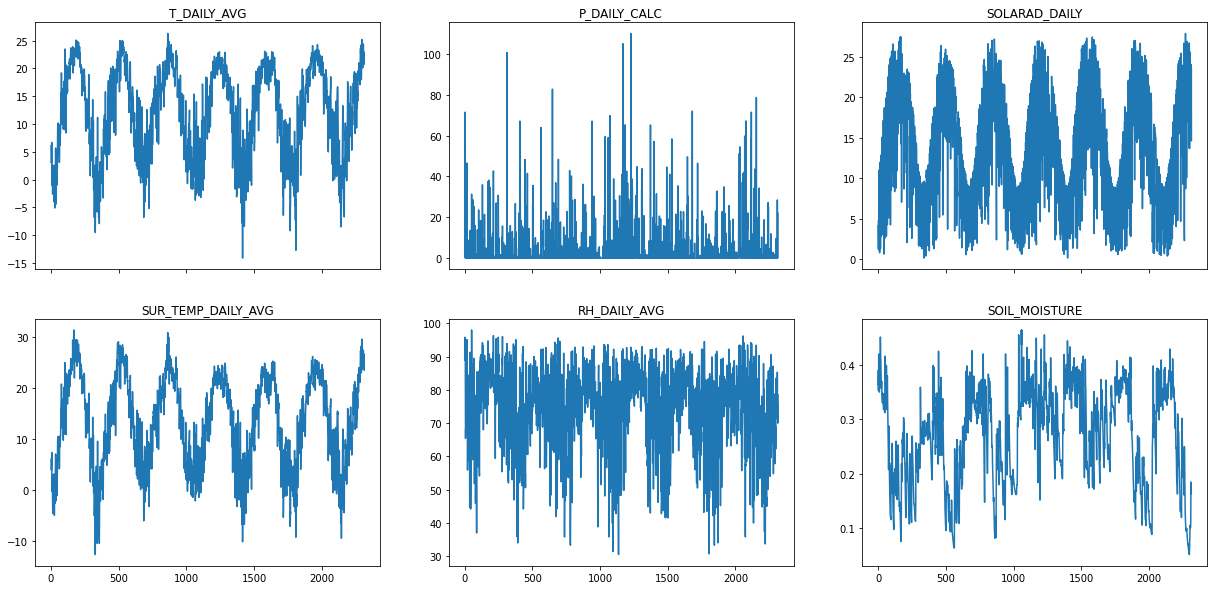

In [ ]:
# Make a quick plot of all the features to gain some understanding as to their characteristics.
fig, ax = plt.subplots(2, 3, figsize=(21, 10), sharex=True)
x = [i for i in range(1, df_data.shape[0]+1)]
for i in range(2):
    for j in range(3):
        idx = i*3+j
        current_ax = ax[i,j]
        if idx==5:
            current_ax.plot(df_soil_moisture.values)
            current_ax.set_title("SOIL_MOISTURE")
            continue
        current_ax.plot(x, df_data.values[:, idx])
        current_ax.set_title(df_data.columns[idx])

# Introduce a one-day time lag to the data

We know that there is most likely a time delay between a relevant input to the soil moisture system and the resulting soil moisture value; ie, it probably takes a few hours (or perhaps even longer) for a rainfall event to create a visible effect at different depths, or for a hot day to cause the top soil layers to lose moisture content.

Thus, let's play with introducing a simple time delay into the data, in single day increments. 

Douglas and I will set it up so you all can play with the time delay.

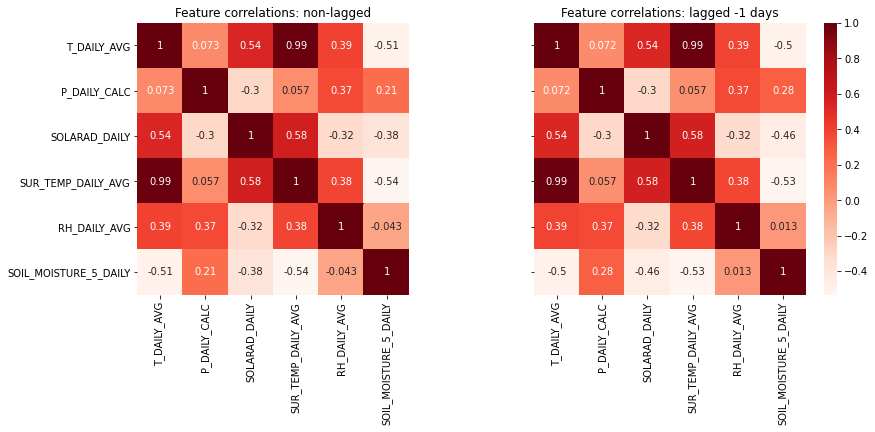

In [ ]:
# Define the number of days to lag the data.
n_days = -1

# Shift the soil moisture data forward by that number of days. Now, each day has 
# the soil moisture from n_days ago assigned to it. So, if n_days=1 and we're 
# looking at today's data, the soil moisture value is actually from yesterday.
################################################################################
################################################################################
#####################         YOUR CODE HERE!         ##########################
################################################################################
df_soil_moisture_lagged = 
df_data_lagged = 
################################################################################
################################################################################
df_combined_lagged = pd.concat([df_data_lagged, df_soil_moisture_lagged], axis=1)

# Combine the feature and target dataframes so as to easily calculate their
# correlation coefficients.
df_combined = pd.concat([df_data, df_soil_moisture], axis=1)

# Calculate the correlations matrix between the variables.
################################################################################
################################################################################
#####################         YOUR CODE HERE!         ##########################
################################################################################
correlations_matrix = 
correlations_matrix_lagged = 
################################################################################

# Load column (ie, feature) names into a list for plotting.
combined_cols_list = df_data.columns.to_list() + df_soil_moisture.columns.to_list()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot the correlation matrix for the non-lagged data.
ax[0] = seaborn.heatmap(
    correlations_matrix, cmap="Reds", annot=True, square=True, cbar=False,
    xticklabels=combined_cols_list, 
    yticklabels=combined_cols_list,
    ax=ax[0]
)
ax[0].set_title("Feature correlations: non-lagged")

ax[1] = seaborn.heatmap(
    correlations_matrix_lagged, cmap="Reds", annot=True, square=True, cbar=True,
    xticklabels=combined_cols_list, 
    yticklabels=["" for i in range(len(combined_cols_list))],
    ax=ax[1]
)
ax[1].set_title(f"Feature correlations: lagged {n_days} days")

fig.show()

It certainly appears that the single-day lagged data provides higher correlations than does the non-lagged data. Thus, we'll continue to use it as our training data.

Also, from the above plot, it appears that RH adds little-to-no information about our 5 cm soil moisture for the day-of-interest. Thus, it appears it is worth trimming from our training data. 

In [ ]:
################################################################################
################################################################################
#####################         YOUR CODE HERE!         ##########################
################################################################################
df_data_lagged_trimmed = 
################################################################################
df_data_lagged_trimmed.head()

,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,SUR_TEMP_DAILY_AVG
2010-01-20,6.1,0.5,4.08,6.0
2010-01-21,3.5,12.1,1.25,3.9
2010-01-22,3.0,0.5,4.80,4.0
2010-01-23,3.6,0.3,1.76,4.1
2010-01-24,6.6,71.5,1.13,6.2


# Train the Multilayer Perceptron Regressor (MLPRegressor) and find the best hyperparameters

Now, it's time to actually train the MLP regressor model. Scikit-learn has a nice section in its *User Guide* that contains a gentle overview of basic neural networks for classification and regression: [Scikit-learn User Guide: 1.17. Neural network models (supervised)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Here, just like the last two lessons, because of the temporal nature of the data, we're sticking with using leave-one-out cross validation.  The idea is to prevent any data leak from the training set to the test set by temporally separating them as best as possible. We'll explore this concept more in upcoming notebooks.

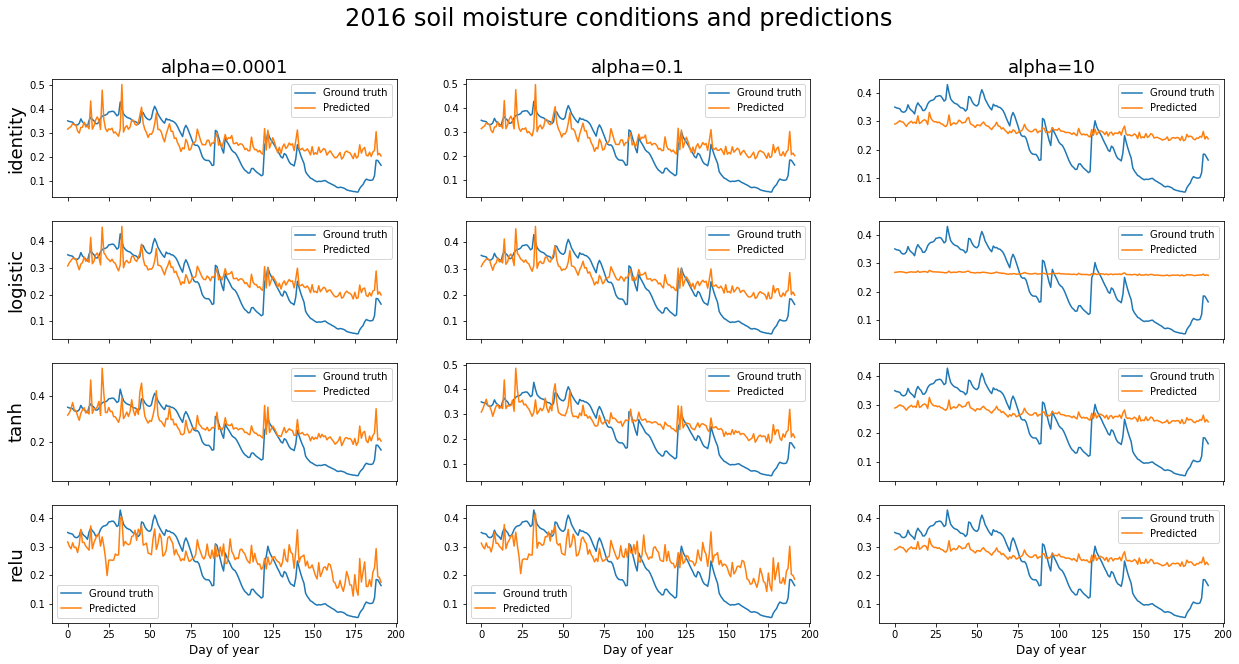

In [ ]:
# Make a list of unique years.
years_list = [d.year for d in df_data.index]
unique_years_list = list(set(years_list))
unique_years_list.sort()

# Define a list of activation functions to use.
activation_functions_list = ["identity", "logistic", "tanh", "relu"]

# Define a list of regularization parameter weights to use. The larger the weight,
# the more the MLP regressor is penalized for overfitting data.
L2_penalty_list = [0.0001, 0.1, 10]

fig, ax = plt.subplots(
    len(activation_functions_list),
    len(L2_penalty_list),
    sharex=True, sharey=False, figsize=(21, 10)
    )

# Define a testing year.
year = 2016

for idx, activation in enumerate(activation_functions_list):
    for jdx, alpha in enumerate(L2_penalty_list):

        # Split the data into training and testing.
        train_idxs_list = [False if y==year else True for y in years_list][:n_days]
        test_idxs_list = [True if y==year else False for y in years_list][:n_days]
        X_train = df_data_lagged_trimmed.loc[train_idxs_list].values
        y_train = df_soil_moisture_lagged.loc[train_idxs_list].values
        X_test = df_data_lagged_trimmed.loc[test_idxs_list].values
        y_test = df_soil_moisture_lagged.loc[test_idxs_list].values

        # Make an sklearn.pipeline object that includes a standard scaler (MLPs 
        # oftentimes don't do well unless their data are scaled).
        ################################################################################
        ################################################################################
        #####################         YOUR CODE HERE!         ##########################
        ################################################################################
        clf = make_pipeline(
                  (
                  #Include the MLPR activation fn. for the current loop.
                  #Include the MLPR regularization penalty for the current loop.
                  random_state=7,
                  ) 
        )
        ################################################################################
        ################################################################################

        # Train the regressor.
        ################################################################################
        #####################         YOUR CODE HERE!         ##########################
        ################################################################################
        
        # Plot the actual soil moisture and predicted soil moisture of the test year.
        current_ax = ax[idx, jdx]
        x = [i for i in range(len(y_test))]        
        current_ax.plot(x, y_test, label="Ground truth")
        current_ax.plot(x, clf.predict(X_test), label="Predicted")
        current_ax.legend()

        if jdx == 0:
            current_ax.set_ylabel(f"{activation}", fontsize=18)
        if idx == 0:
            current_ax.set_title(f"alpha={alpha}", fontsize=18)
        if idx == 3:
            current_ax.set_xlabel("Day of year", fontsize=12)


fig.suptitle(
    f"{year} soil moisture conditions and predictions",
    fontsize=24
)
fig.show()